In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\siddh\AppData\Local\Temp\ipykernel_21836\276062395.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
customer = pd.read_csv("Customer.csv")
prod_info = pd.read_csv("prod_cat_info.csv")
transaction = pd.read_csv("Transactions.csv")

In [3]:
customer.shape

(5647, 4)

In [4]:
prod_info.shape

(23, 4)

In [5]:
transaction.shape

(23053, 10)

In [6]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [7]:
prod_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [8]:
prod_info.rename(columns={"prod_sub_cat_code" : "prod_subcat_code"}, inplace=True)

In [9]:
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2/28/2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2/27/2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2/24/2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2/24/2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2/23/2014,6,5,-2,-791,166.110,-1748.110,TeleShop


1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [10]:
prod_trans_concat = pd.merge(left=transaction, right=prod_info, on=["prod_cat_code", "prod_subcat_code"], how="left")

In [11]:
prod_trans_concat

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,2/28/2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,2/27/2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,2/24/2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,2/24/2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,2/23/2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,1/25/2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic
23049,89780862956,270022,1/25/2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens
23050,85115299378,271020,1/25/2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing
23051,72870271171,270911,1/25/2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children


In [12]:
prod_trans_concat.isnull().sum().sum()

0

In [13]:
customer_final = pd.merge(left=prod_trans_concat, right=customer, right_on="customer_Id", left_on="cust_id", how="left")

In [14]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2/28/2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,2/27/2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,2/24/2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,2/24/2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,2/23/2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [15]:
customer_final.shape

(23053, 16)

In [16]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [17]:
customer_final.isna().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [18]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"], format="%d-%m-%Y")

In [19]:
customer_final["DOB"].head()

0   1981-09-26
1   1973-05-11
2   1992-07-27
3   1981-06-08
4   1992-07-27
Name: DOB, dtype: datetime64[ns]

In [20]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])

In [21]:
customer_final["tran_date"].head()

0   2014-02-28
1   2014-02-27
2   2014-02-24
3   2014-02-24
4   2014-02-23
Name: tran_date, dtype: datetime64[ns]

In [22]:
customer_final.duplicated().sum()

13

In [23]:
customer_final.drop_duplicates(inplace=True)

In [24]:
customer_final.duplicated().sum()

0

2. Prepare a summary report for the merged data set.

a. Get the column names and their corresponding data types

In [25]:
customer_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat', 'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [26]:
customer_final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

b. Top/Bottom 10 observations

In [27]:
customer_final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [28]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [29]:
customer_final.describe()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,DOB,city_code
count,2.304000e+04,23040.000000,23040,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040,23032.000000
mean,5.006955e+10,271021.880252,2012-08-09 05:59:11.250000128,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,271021.880252,1981-07-14 18:04:37.500000,5.483067
min,3.268991e+06,266783.000000,2011-01-25 00:00:00,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1970-01-02 00:00:00,1.000000
25%,2.493315e+10,268935.000000,2011-11-02 18:00:00,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,1975-09-25 12:00:00,3.000000
50%,5.009188e+10,270980.500000,2012-08-11 00:00:00,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,270980.500000,1981-06-16 00:00:00,5.000000
75%,7.532632e+10,273114.250000,2013-05-17 00:00:00,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,273114.250000,1987-06-05 06:00:00,8.000000
max,9.998755e+10,275265.000000,2014-02-28 00:00:00,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,1992-12-29 00:00:00,10.000000
std,2.898062e+10,2431.573668,NaN,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2431.573668,NaN,2.863331


d. Frequency tables for all the categorical variables

In [30]:
customer_final.loc[:, customer_final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23040,23040,23040,23031
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9304,6066,3046,11804


3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [31]:
cont_var = customer_final.loc[:, ["prod_subcat_code", "prod_cat_code", "Qty", "Rate", "Tax", "total_amt"]]

In [32]:
cont_var.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

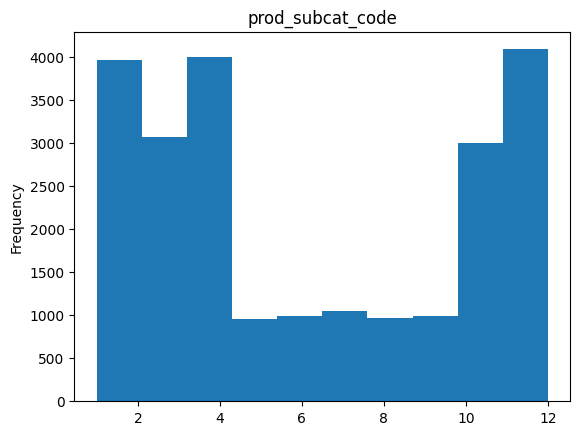

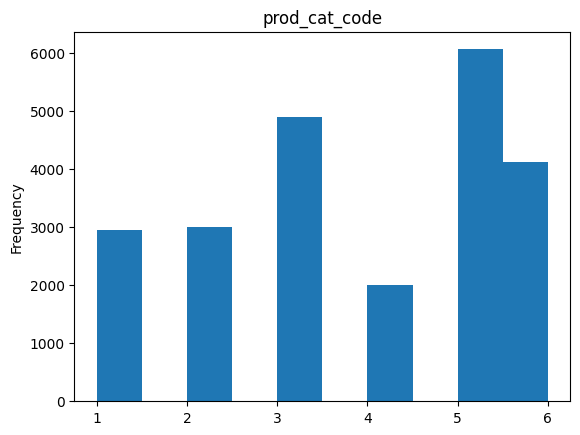

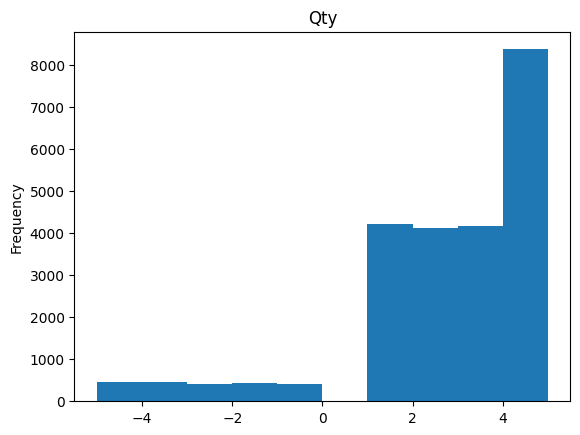

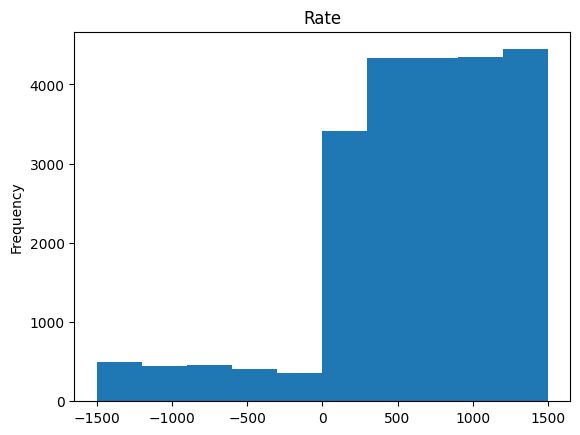

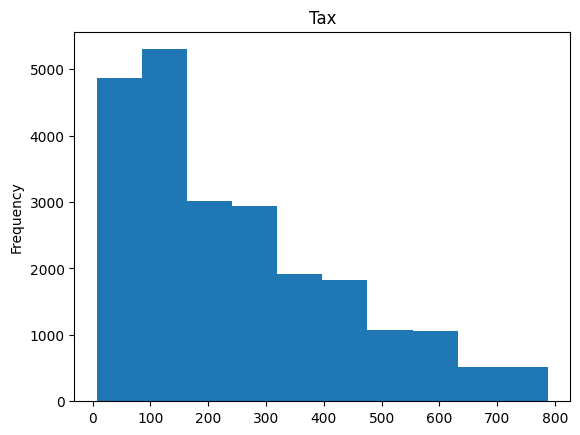

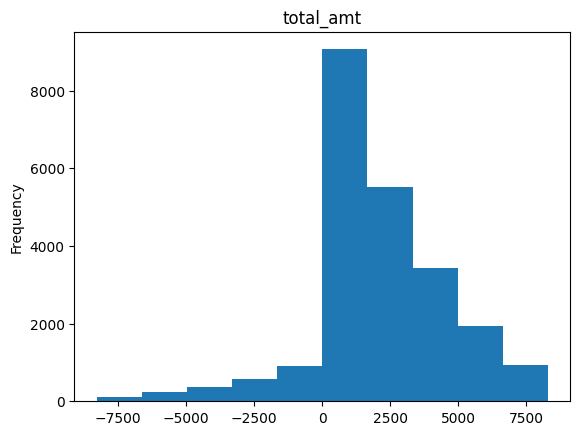

In [33]:
for i in cont_var.columns:
  cont_var[i].plot(kind="hist")
  plt.title(i)
  plt.show()

In [34]:
categ_var = customer_final.loc[:, customer_final.dtypes=="object"]

In [35]:
categ_var.columns

Index(['Store_type', 'prod_cat', 'prod_subcat', 'Gender'], dtype='object')

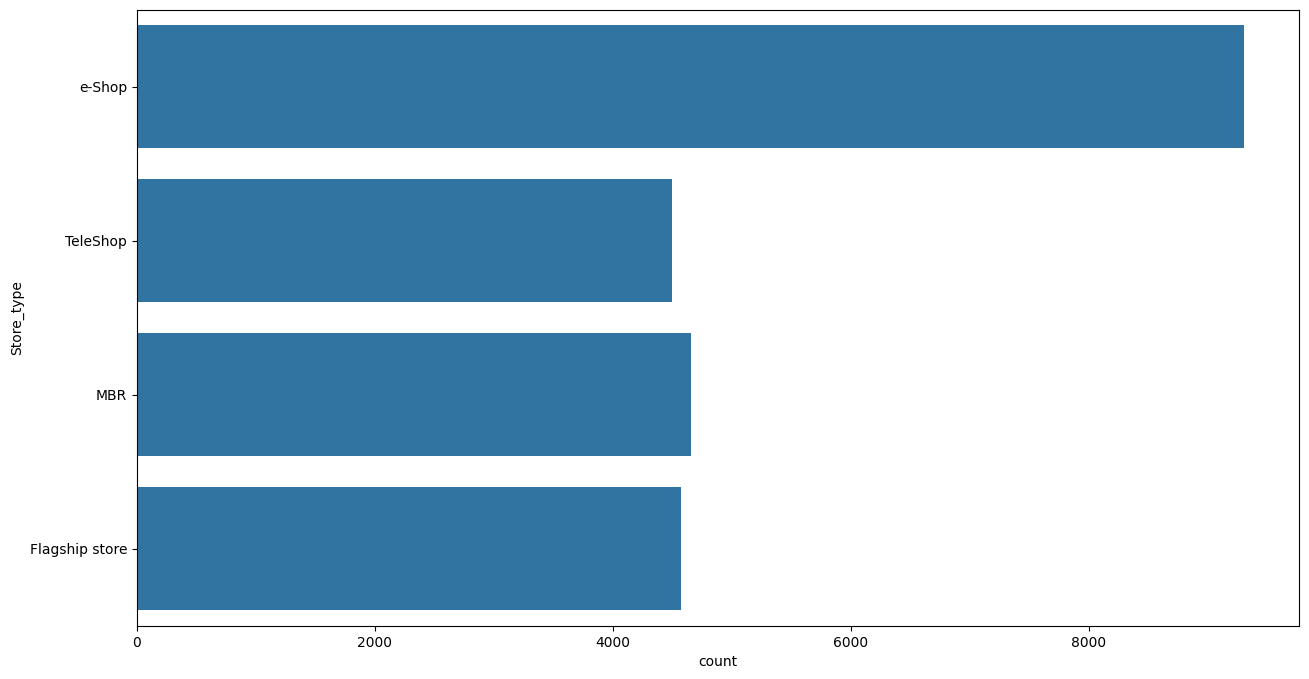

In [129]:
plt.figure(figsize=(15,8))
sns.countplot(categ_var["Store_type"])
plt.show()

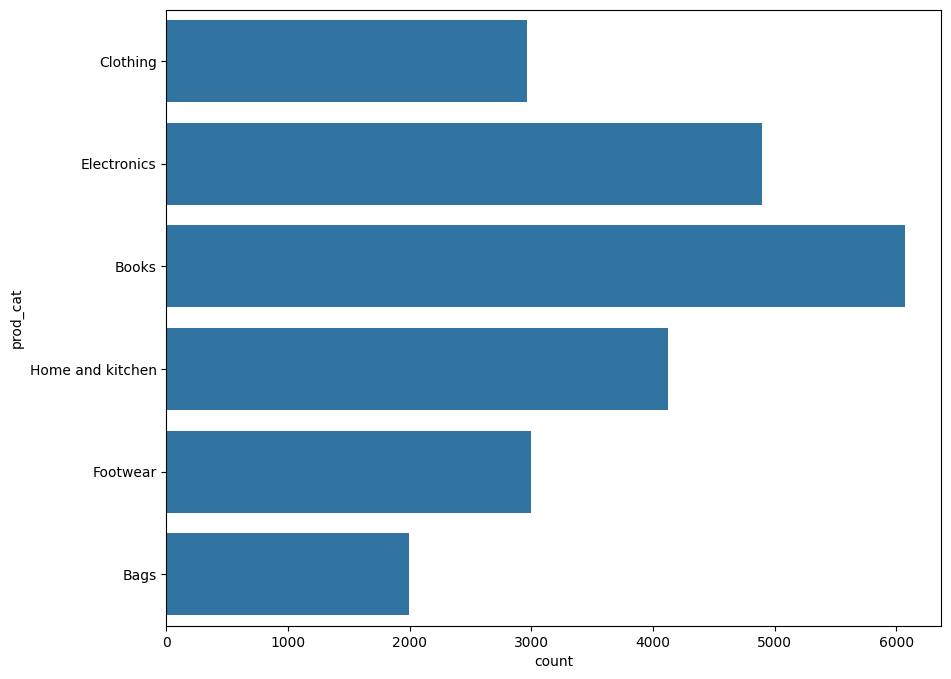

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(categ_var["prod_cat"])
plt.show()

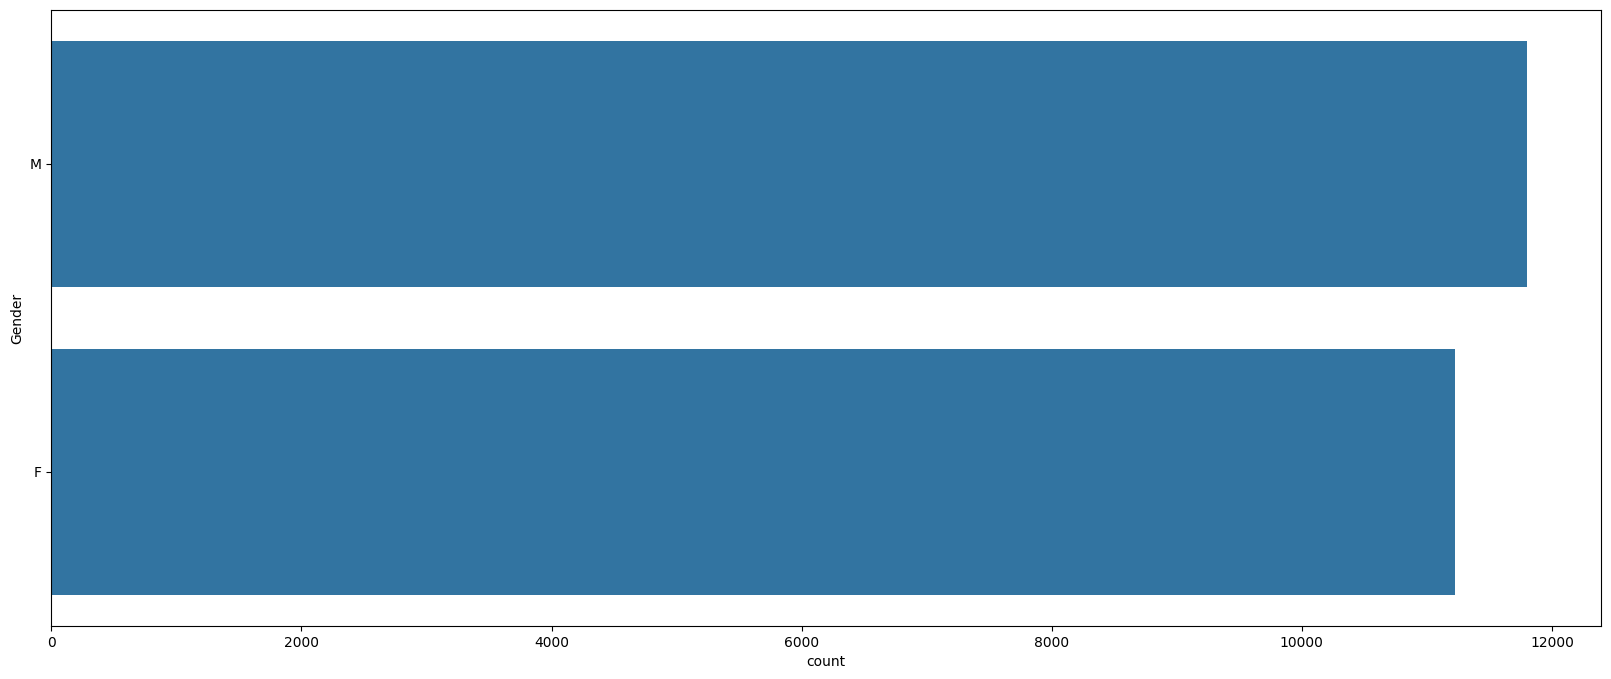

In [131]:
plt.figure(figsize=(20,8))
sns.countplot(categ_var["Gender"])
plt.show()

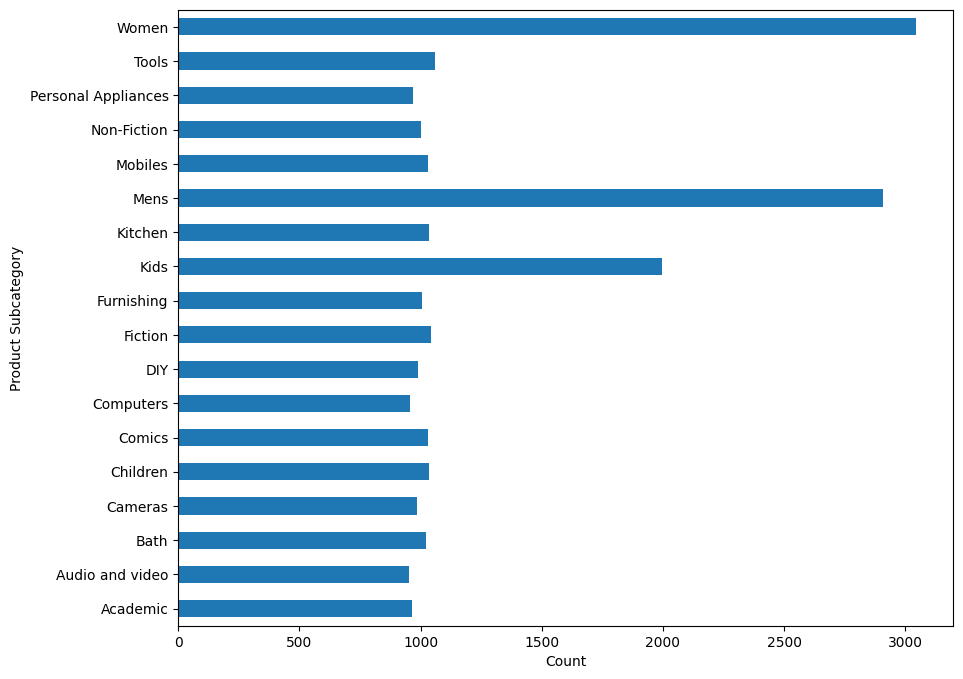

In [47]:
plt.figure(figsize=(10,8))
categ_var.groupby("prod_subcat")["prod_subcat"].count().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Product Subcategory")
plt.show()

4. Calculate the following information using the merged dataset :

a. Time period of the available transaction data


In [48]:
customer_final.sort_values(by="tran_date")

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0
23033,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,Clothing,Kids,268885,1989-04-14,F,6.0
23034,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
23035,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,Clothing,Kids,267094,1992-11-24,M,9.0
23036,46821751538,269160,2011-01-25,10,5,5,941,494.025,5199.025,TeleShop,Books,Non-Fiction,269160,1972-01-24,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0


In [49]:
min_date = customer_final["tran_date"].min()

In [50]:
max_date = customer_final["tran_date"].max()

In [51]:
print(f"The time period of the available transaction data is from {pd.Timestamp.strftime(min_date, format="%d-%m-%Y")} to {pd.Timestamp.strftime(max_date, format="%d-%m-%Y")}")

The time period of the available transaction data is from 25-01-2011 to 28-02-2014


b. Count of transactions where the total amount of transaction was negative

In [53]:
neg_trans = customer_final.loc[customer_final["total_amt"] < 0, "transaction_id"].count()
neg_trans

2164

5. Analyze which product categories are more popular among females vs male customers.

In [55]:
pop_cat = customer_final.groupby(["Gender", "prod_cat"])[["Qty"]].sum().reset_index()
pop_cat

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6486


In [56]:
pop_cat.pivot(index="Gender", columns="prod_cat", values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


Product categories that are more popular among females are:

Bags

Footwear

Product categories that are more popular among males are:

Books

Clothing

Electronics

Home and kitchen

6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [57]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0


In [58]:
city_max_cust = customer_final.groupby("city_code")["customer_Id"].count().sort_values(ascending=False)
city_max_cust

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: customer_Id, dtype: int64

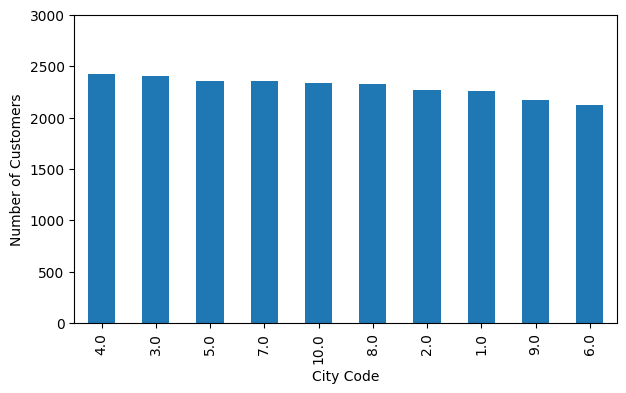

In [77]:
plt.figure(figsize=(7,4))
city_max_cust.plot(kind="bar")
plt.xlabel("City Code")
plt.ylabel("Number of Customers")
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [69]:
perc = round((city_max_cust[4.0] / city_max_cust.sum()) * 100, 2)
perc

10.52

In [80]:
print(f"The City Code 4.0 has the maximum customers and the percentage of customers from that city which is: {perc}%")

The City Code 4.0 has the maximum customers and the percentage of customers from that city which is: 10.52%


7. Which store type sells the maximum products by value and by quantity?

In [83]:
customer_final.groupby("Store_type")[["Qty", "Rate"]].sum().sort_values(by="Qty", ascending=False)

,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


In [85]:
print("e-shop sells the maximum products by value and by quantity")

e-shop sells the maximum products by value and by quantity


8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [88]:
stores = round(customer_final.pivot_table(index="prod_cat", columns="Store_type", values="total_amt", aggfunc="sum"), 2)
stores

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1617933.26
Books,2493677.81,2496039.19,2545714.47,5297161.16
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107969.83,1978457.20,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.38,3327977.12


In [90]:
stores.loc[["Clothing", "Electronics"], "Flagship store"].sum()

3409559.27

9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [91]:
gender_M = round(customer_final.pivot_table(index="prod_cat", columns="Gender", values="total_amt", aggfunc="sum"), 2)
gender_M

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.78
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.22,3020200.36
Home and kitchen,4133702.24,4305169.50


In [93]:
amt_earned_M = gender_M.loc["Electronics", "M"]
amt_earned_M

5711351.62

10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [94]:
posi_trans = customer_final.loc[customer_final["total_amt"] > 0, :]
posi_trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [95]:
unique_trans = posi_trans.groupby(["customer_Id", "prod_cat", "prod_subcat"])["transaction_id"].count().reset_index()
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [97]:
unique_trans_cnt = unique_trans.groupby("customer_Id")["transaction_id"].count().reset_index()
unique_trans_cnt

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [98]:
unique_trans_cnt[unique_trans_cnt["transaction_id"] > 10]

,customer_Id,transaction_id


In [100]:
print("There are no unique transactions greater than 10.")

There are no unique transactions greater than 10.


11. For all customers aged between 25 - 35, find out:

a. What was the total amount spent for “Electronics” and “Books” product categories?

In [105]:
now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format='%m%d%y')
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] - pd.DateOffset(years=100))
customer_final['AGE'] = ((now - customer_final['DOB']).dt.days / 365).astype(int)

In [106]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,42
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,50
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,42
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31


In [108]:
customer_final["Age_cat"] = pd.cut(customer_final["AGE"], bins=[2, 35, 46, 57], labels=["25-35", "36-46", "47-57"], include_lowest=True)
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,42,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,50,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,42,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35


In [110]:
cust_25_35 = customer_final.groupby(["Age_cat", "prod_cat"])["total_amt"].sum()
print(cust_25_35)

Age_cat  prod_cat        
25-35    Bags                 829872.680
         Books               2595667.100
         Clothing            1411493.850
         Electronics         2216828.900
         Footwear            1393656.940
         Home and kitchen    1816014.460
36-46    Bags                1936082.655
         Books               6106069.775
         Clothing            3085978.805
         Electronics         5189152.930
         Footwear            3008815.550
         Home and kitchen    4062687.200
47-57    Bags                1360386.495
         Books               4130855.755
         Clothing            1753664.835
         Electronics         3324724.000
         Footwear            1823432.325
         Home and kitchen    2565910.555
Name: total_amt, dtype: float64


C:\Users\siddh\AppData\Local\Temp\ipykernel_21836\1283473787.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cust_25_35 = customer_final.groupby(["Age_cat", "prod_cat"])["total_amt"].sum()


In [117]:
print(f"Total amount spent on 'Electronics' and 'Books' product categories is: {cust_25_35.loc["25-35", ["Books", "Electronics"]].sum()}")

Total amount spent on 'Electronics' and 'Books' product categories is: 4812496.0


b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [118]:
customer_final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0,42,36-46
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0,50,47-57
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0,42,36-46
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35


In [119]:
ttl_amt_25_35 = customer_final[customer_final["Age_cat"]=="25-35"]
ttl_amt_25_35.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,34,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,32,25-35
37,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,Women,267058,1992-02-06,F,10.0,32,25-35


In [122]:
ttl_amt = ttl_amt_25_35[(ttl_amt_25_35["tran_date"] >= "2014-01-01") & (ttl_amt_25_35["tran_date"] <= "2014-03-01")]
ttl_amt

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code,AGE,Age_cat
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0,31,25-35
23,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,Mens,268509,1989-08-17,M,10.0,34,25-35
28,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,Women,268444,1992-01-02,F,6.0,32,25-35
37,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,Women,267058,1992-02-06,F,10.0,32,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,14460826915,269348,2014-01-01,11,6,3,84,26.460,278.460,MBR,Home and kitchen,Bath,269348,1989-02-10,M,9.0,35,25-35
1051,32889219128,269536,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,269536,1990-03-21,M,5.0,33,25-35
1054,42711619809,271701,2014-01-01,1,2,5,336,176.400,1856.400,MBR,Footwear,Mens,271701,1991-07-11,M,7.0,32,25-35
1059,67088172893,271877,2014-01-01,1,1,1,902,94.710,996.710,e-Shop,Clothing,Women,271877,1992-03-28,F,6.0,31,25-35


In [124]:
print(f"The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is: {ttl_amt_25_35["total_amt"].sum()}")

The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is: 10263533.93
